# Employee Attrition Analysis - Data Dictionary Setup

***Initial data import, schema inspection, and dictionary creation***

**Owner:** Katherine Ygbuhay  
**Updated:** October 2025  
**Stage:** Setup (01)

**Goal**  
Load the raw dataset, inspect its structure, and produce a professional data dictionary that documents variables, types, and definitions.  

**Scope**  
- Work only with the raw file: `data/raw/salifort_employee_attrition_raw.csv`  
- Inspect data shape, columns, dtypes, and class balance of the target (`left`).  
- Save outputs to `docs/reference/data_dictionary.md`.  
- Do not perform cleaning or modeling at this stage.  

**Contents**  
- Import & settings  
- Load dataset  
- Inspect shape and datatypes  
- Check target distribution  
- Draft data dictionary  
- Export markdown file  

---

## 1. Imports & Settings

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 120)
%matplotlib inline

In [3]:
import sys; [p for p in sys.path if "portfolio" in p]

['/home/admin/Documents/portfolio',
 '/home/admin/Documents/portfolio/coursework/google-advanced-data-analytics/employee_attrition_analysis/notebooks']

In [4]:
# %% Accessibility setup for visuals (colorblind-friendly, high-contrast)
from src.viz_access import quick_accessibility_setup
quick_accessibility_setup()

ModuleNotFoundError: No module named 'src'

## 2. Data Loading

In [9]:
# %% Data loading (robust)
from pathlib import Path

# Find project root dynamically by looking upward for the "data" folder
current_dir = Path.cwd()
while current_dir != current_dir.parent:  # stop at filesystem root
    if (current_dir / "data" / "raw").exists():
        PROJECT_ROOT = current_dir
        break
    current_dir = current_dir.parent
else:
    raise FileNotFoundError("❌ Could not locate project root containing 'data/raw'")

# Dataset path
DATA_PATH = PROJECT_ROOT / "data" / "raw" / "salifort_employee_attrition_raw.csv"

# Load
df = pd.read_csv(DATA_PATH)

print(f"✅ Loaded dataset from: {DATA_PATH}")
print(f"Shape: {df.shape[0]} rows × {df.shape[1]} columns\n")

✅ Loaded dataset from: /home/admin/Documents/portfolio/coursework/google-advanced-data-analytics/employee_attrition_analysis/data/raw/salifort_employee_attrition_raw.csv
Shape: 14999 rows × 10 columns



## 3. Initial Inspection

In [14]:
# %% Initial Inspection

# Schema overview
df.info()

# Preview first rows
display(df.head())

# Column summary
col_summary = pd.DataFrame({
    "dtype": df.dtypes,
    "n_unique": df.nunique(),
    "n_missing": df.isna().sum(),
    "missing_pct": (df.isna().mean() * 100).round(2)
})
col_summary

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


,dtype,n_unique,n_missing,missing_pct
satisfaction_level,float64,92,0,0.0
last_evaluation,float64,65,0,0.0
number_project,int64,6,0,0.0
average_montly_hours,int64,215,0,0.0
time_spend_company,int64,8,0,0.0
Work_accident,int64,2,0,0.0
left,int64,2,0,0.0
promotion_last_5years,int64,2,0,0.0
Department,object,10,0,0.0
salary,object,3,0,0.0


## 4. Target Variable Distribution

left
0    0.761917
1    0.238083
Name: proportion, dtype: float64


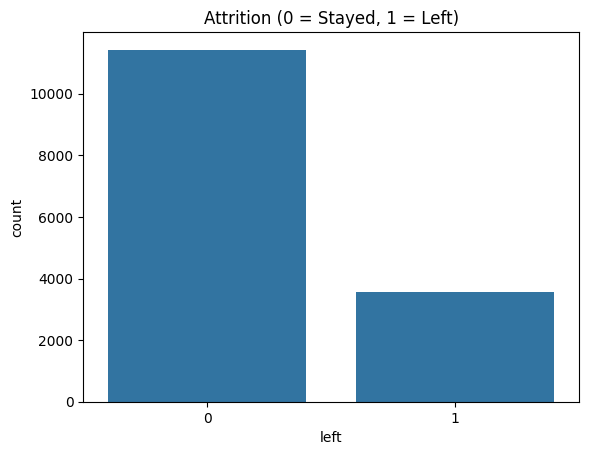

In [11]:
target_col = "left"
print(df[target_col].value_counts(normalize=True).rename("proportion"))
sns.countplot(x=target_col, data=df)
plt.title("Attrition (0 = Stayed, 1 = Left)")
plt.show()